# Исследование данных о российском кинопрокате

### Цели и задачи исследования

**Цель:** изучить рынок российского кинопроката и выявить текущие тренды. 
Особое внимание уделим фильмам, которые получили государственную поддержку, чтобы понять, насколько такие фильмы интересны зрителю.

**Задачи проекта:**
- анализ количества и особенностей фильмов, выходящих в прокат;
- анализ сборов от проката фильмов в кинотеатрах;
- исследование фильмов, получившим государсвенную поддержку.

**План работ:**
1. Общий анализ данных о прокатных удостоверениях фильмов, сборах и объеме государственной поддержки;
2. Проверить и заполнить пропуски данных там, где это возможно
3. Заменить типы данных на корректные
4. Очистить данные от выборосов
5. Проверить наличие явных и неявных дубликатов и очистить от них данные при необходимости
6. Рассчитать и добавить новые параметры
7. Провести общий анализ параметров фильмов, вышедших в прокат, построить и проверить гипотезы об их взаимосвязях
8. Проанализировать тенденции количества фильмов, выходящих в прокат;
9. Проанализирвоать сборы от проката фильмов в кинотеатрах;
10. Проанализировать влияние возрастных ограничений на финансовую успешность фильма;
11. Исследовать фильмы, которые получили государсвенную поддержку.


### Общая информация о файлах 

В работе 2 файла `mkrf_movies` и `mkrf_shows`, которые необходимо объединить в один. Прочитаем и откроем оба датафрейма, проверим общую информацию о таблицах, чтобы убедиться в одинаковости типов данных, необходимых для объединения файлов.

In [187]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

In [188]:
data_movies = pd.read_csv('mkrf_movies.csv')
data_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [189]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [190]:
#прочитаем файл с данными сборов от проката в кинотеатрах

data_shows = pd.read_csv('mkrf_shows.csv')
data_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [191]:
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Объединять таблицы будем по столбцу `puNumber`, для этого приведем столбец к од инаковому типу. 

In [192]:
# меняем тип с object на float64 
# проверяем пропуски в столбце puNumber

data_movies['puNumber'] = pd.to_numeric(data_movies['puNumber'], errors='coerce')
data_movies.loc[data_movies['puNumber'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),NaN,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
# удалим строку с пропущенным значением в столбце puNumber

data_movies = data_movies.dropna(subset=['puNumber'])
data_movies['puNumber'].isna().sum()

0

In [194]:
# сменим тип данных в столбце с float64 на int64

data_movies['puNumber'] = data_movies['puNumber'].astype('int')

In [195]:
data_movies['puNumber'].dtypes

dtype('int64')

Проверим количество строк и столбцов в объединяемых таблица `data_movies` и `data_shows`.

In [196]:
data_movies.shape

(7485, 15)

In [197]:
data_shows.shape

(3158, 2)

In [198]:
# объединим таблицы в один датафрейм по столбцу puNumber
data = data_shows.merge(data_movies, on='puNumber', how='outer') 
data.head()

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,111000113,2.450000e+03,Тайна перевала Дятлова,2013-01-17T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.1,"ужасы,фантастика"
1,111000115,6.104000e+04,Небесный верблюд,2015-01-14T12:00:00.000Z,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.0,34000000.0,49280496.0,Министерство культуры,6.7,"детский,семейный"
2,111000116,1.530300e+08,"Статус: ""Свободен""",2016-01-13T12:00:00.000Z,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,20000000.0,20000000.0,78686500.0,Фонд кино,5.8,"комедия,мелодрама"
3,111000117,1.226096e+07,После тебя,2017-01-10T12:00:00.000Z,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,7000000.0,20000000.0,45483233.0,"Министерство культуры, Фонд кино",6.7,драма
4,111000118,1.636841e+08,ЗОМБОЯЩИК (ZОМБОЯЩИК),2018-01-23T12:00:00.000Z,Художественный,"ООО ""Комеди Клаб продакшн""",Россия,"З.Болотаев, К.Смирнов","Е.Казаков, Т.Бадзиев",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,3.2,комедия


In [199]:
data.shape

(7485, 16)

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   puNumber               7485 non-null   int64  
 1   box_office             3158 non-null   float64
 2   title                  7485 non-null   object 
 3   show_start_date        7485 non-null   object 
 4   type                   7485 non-null   object 
 5   film_studio            7467 non-null   object 
 6   production_country     7483 non-null   object 
 7   director               7476 non-null   object 
 8   producer               6917 non-null   object 
 9   age_restriction        7485 non-null   object 
 10  refundable_support     332 non-null    float64
 11  nonrefundable_support  332 non-null    float64
 12  budget                 332 non-null    float64
 13  financing_source       332 non-null    object 
 14  ratings                6519 non-null   object 
 15  genr

Проверили размерность объединенного датафрейма, данные успешно объединены. В итоговую таблицу вошли 7485 строк и 16 столбцов, данными по присоединяемому параметру `box_office` получили 3158 строк, все, что содержалось в исходном файле `data_shows`.

Вывод:
 - в работу взяли датафрейм, получившийся объединением двух таблиц, которые содержали данные о сборах фильмов в прокате и общую информацию о фильмах. Таблицы объединены корректно.
 - датафрейм состоит из 16 колонок, в 11 из которых есть пропуски данных, к которым вернемся в дальшейших этапах;
 - некорректны несколько типов данных `show_start_date` обозначен как object, но в данном столбце содержатся дата/время и корректный тип данных - `datetime`, `ratings` обозначен как object, но дробные значения рейтинга фильмов корректнее привести к типу float.

### Предобработка данных

#### Исследование типов данных

Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [201]:
data.dtypes

puNumber                   int64
box_office               float64
title                     object
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
dtype: object

Заменим типы данных на корректные в следующих столбцах:
- `show_start_date` на `datetime`;
- `ratings` на `float`.

In [202]:
data['show_start_date'] = pd.to_datetime(
    data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

data['show_start_date'].dtypes

datetime64[ns, UTC]

In [203]:
#проверим какие данные содержит ratings

data['ratings'].unique()

array(['5.1', '6.7', '5.8', '3.2', '5.3', '3.0', '5.4', '6.1', '5.9',
       '4.7', '6.6', '6.0', '7.2', '7.1', '4.5', '7.3', '3.3', '6.8',
       '5.7', nan, '4.9', '4.3', '2.8', '6.2', '3.9', '1.9', '4.8', '7.0',
       '7.5', '6.4', '99%', '4.2', '6.5', '5.2', '5.0', '3.1', '6.3',
       '5.6', '3.7', '2.6', '8.0', '6.9', '7.8', '4.1', '91%', '2.9',
       '7.4', '3.4', '4.6', '7.9', '8.5', '8.1', '98%', '7.6', '94%',
       '1.4', '3.8', '7.7', '1.5', '2.7', '4.4', '4.0', '2.5', '8.3',
       '8.8', '1.2', '8.4', '5.5', '8.2', '8.7', '1.6', '79%', '9.2',
       '1.0', '89%', '90%', '2.1', '28%', '2.4', '3.5', '83%', '64%',
       '8.6', '3.6', '88%', '19%', '97%', '1.1', '62%', '1.3', '1.8',
       '1.7', '9.0', '8.9', '9.1'], dtype=object)

In [204]:
#уберем знак %, чтобы перевести тип данных object в float64

data['ratings'] = data['ratings'].str.replace('%', '')
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
data['ratings'].dtypes

dtype('float64')

In [205]:
data.dtypes

puNumber                               int64
box_office                           float64
title                                 object
show_start_date          datetime64[ns, UTC]
type                                  object
film_studio                           object
production_country                    object
director                              object
producer                              object
age_restriction                       object
refundable_support                   float64
nonrefundable_support                float64
budget                               float64
financing_source                      object
ratings                              float64
genres                                object
dtype: object

**Вывод:** 
- заменили типы данных на корректные в столбцах `show_start_date` и `ratings`;
- в столбце `ratings` нашли выбивающиеся из общей размерности данные, вернемся к их корректировке на этапе обработки количественных данных.

#### Заполнение пропусков в данных

Проверим количество и качество пропущенных данных и заполним их там, где это возможно.

In [206]:
data.isna().sum()

puNumber                    0
box_office               4327
title                       0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
dtype: int64

In [207]:
#проверим долю пропусков

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (20, 6), legend = False, fontsize = 16, grid=True)
            .set_title('Доля пропущенных значений в столбцах, %' + "\n", fontsize = 15, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

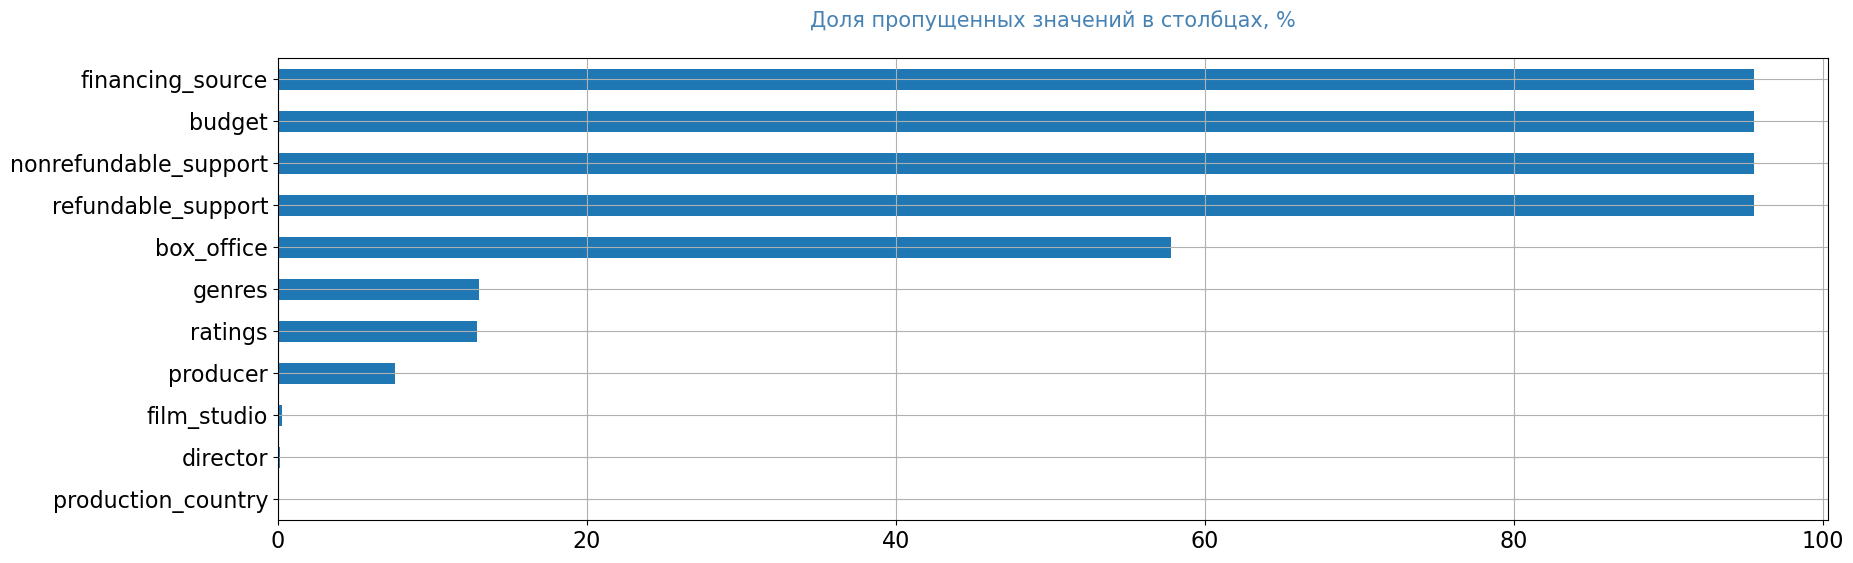

In [208]:
pass_value_barh(data)

In [209]:
#заменим пропуски в категориальных данных
data['financing_source'] = data['financing_source'].fillna('Не определен')
data['producer'] = data['producer'].fillna('Не определен')
data['film_studio'] = data['film_studio'].fillna('Не определена')
data['director'] = data['director'].fillna('Не определен')
data['production_country'] = data['production_country'].fillna('Не определен')

data.isna().sum()

puNumber                    0
box_office               4327
title                       0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source            0
ratings                   966
genres                    975
dtype: int64

**Вывод:**
- заменили пропущенные значения в столбцах `genres`, `producer`, `film_studio`, `director`, `financing_source`, содержащих категориальные данные, на значение "Не определен";
- столбцы `budget`, `nonrefundable_support`, `refundable_support`, `box_office`, `ratings`, в которых содержатся количественные данные и есть пропуски, оставим без изменений, поскольку некорректно заполнять их расчетными значениями, основываясь на других фильмах, а также заполнять нулями, так как это исказит результаты дальнейшего анализа (расчет среднего значения, выбросы, квантили).

#### Поиск дубликатов
Проверим, есть ли в данных явные и неявные дубликаты.

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   puNumber               7485 non-null   int64              
 1   box_office             3158 non-null   float64            
 2   title                  7485 non-null   object             
 3   show_start_date        7485 non-null   datetime64[ns, UTC]
 4   type                   7485 non-null   object             
 5   film_studio            7485 non-null   object             
 6   production_country     7485 non-null   object             
 7   director               7485 non-null   object             
 8   producer               7485 non-null   object             
 9   age_restriction        7485 non-null   object             
 10  refundable_support     332 non-null    float64            
 11  nonrefundable_support  332 non-null    float64          

In [211]:
#проверм дубликаты в столбцах puNumber и title

data[data.duplicated(['puNumber', 'title'])]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


Дублирующих значений в сумме столбцов `puNumber` и `title` не обнаружено.

На этапе анализа данных обнаружили неявные дубликаты в имени и фамилии режиссера. Приведем их к одному значению.

In [212]:
data.query('director.str.contains("Семёнова")', engine='python')['director'].unique()

array(['О.Семёнова', 'Семёнова О.А.', 'О. Семёнова', 'О.Семёнова ',
       'О.Семёнова  ', 'О Семёнова'], dtype=object)

In [213]:
#def для замены разных написания ФИО на корректную

def replace_wrong_values(wrong_values, correct_value):
    for wrong_value in wrong_values:
        data['director'] = data['director'].replace(wrong_value, correct_value)

duplicates = ['О.Семёнова', 'Семёнова О.А.', 'О. Семёнова', 'О.Семёнова ', 'О.Семёнова  ', 'О Семёнова']
name = 'О.Семёнова'
replace_wrong_values(duplicates, name)

In [214]:
data.query('director.str.contains("Семёнова")', engine='python')['director'].unique()

array(['О.Семёнова'], dtype=object)

In [215]:
#проверяем наличие явных строк-дубликатов

data.duplicated().sum()

0

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   puNumber               7485 non-null   int64              
 1   box_office             3158 non-null   float64            
 2   title                  7485 non-null   object             
 3   show_start_date        7485 non-null   datetime64[ns, UTC]
 4   type                   7485 non-null   object             
 5   film_studio            7485 non-null   object             
 6   production_country     7485 non-null   object             
 7   director               7485 non-null   object             
 8   producer               7485 non-null   object             
 9   age_restriction        7485 non-null   object             
 10  refundable_support     332 non-null    float64            
 11  nonrefundable_support  332 non-null    float64          

**Вывод:**
- дублирующих значений в сумме столбцов `puNumber` и `title` не обнаружено;
- обнаружены неявные дубликаты в написании фамилии одного из режиссеров, данные исправлены;
- явных строк-дубликатов не обнаружено.

#### Категориальные значения

Проверим заполнение столбцов с категориальными данными и скорректируем их при необходимости.

In [217]:
data['type'].unique()

array(['Художественный', ' Художественный', 'Научно-популярный',
       'Анимационный', 'Документальный', ' Анимационный', 'Прочие',
       'Музыкально-развлекательный'], dtype=object)

In [218]:
data['type'] = data['type'].str.strip()
data['type'].unique()

array(['Художественный', 'Научно-популярный', 'Анимационный',
       'Документальный', 'Прочие', 'Музыкально-развлекательный'],
      dtype=object)

In [219]:
data['age_restriction'].value_counts().to_frame()

,age_restriction
«16+» - для детей старше 16 лет,2851
«18+» - запрещено для детей,1605
«12+» - для детей старше 12 лет,1592
«0+» - для любой зрительской аудитории,811
«6+» - для детей старше 6 лет,626


In [220]:
data['financing_source'].value_counts().to_frame()

,financing_source
Не определен,7153
Министерство культуры,164
Фонд кино,146
"Министерство культуры, Фонд кино",22


In [221]:
data['genres'].value_counts().to_frame()

,genres
драма,476
комедия,352
"мелодрама,комедия",222
"драма,мелодрама,комедия",189
"драма,мелодрама",183
...,...
"военный,детектив",1
"триллер,фэнтези",1
"мелодрама,драма,фэнтези",1
"семейный,документальный",1


In [222]:
data['film_studio'].value_counts().to_frame()

,film_studio
"Киностудия ""Мосфильм""",341
"ООО ""Мульт в кино""",57
Анимаккорд Лтд,23
Не определена,18
"ООО ""Мульт в кино""",18
...,...
"ООО ""Студия анимационного кино ""Мельница"", ""ООО ""Паровоз"", ООО ""Анимационная студия ""МУ"", ООО ""Продюсерский центр ""Рики"", ООО ""РИА ""ПАНДА"", ООО ""КиноАтис""",1
"ООО ""Паровоз"", ООО ""Анимационная студия ""МУ"", ООО ""Продюсерский центр ""Рики"", ООО ""КиноАтис"", ООО ""Студия анимационного кино ""Мельница""",1
"Анима Эстудиос, Дискрит Артс Продакшнз, Итака Филмс, Ло Колоко Филмс",1
"Метро Голдвин Майер, Парамаунт Пикчерз, Покет Пикчерз, Спай Кидз 4",1


In [223]:
data['production_country'].value_counts().to_frame()

,production_country
США,2172
Россия,1820
СССР,347
Франция,301
Великобритания,257
...,...
"Франция, Бельгия, Люксембург",1
"Финляндия, Латвия",1
КНР - Франция,1
Дания - Канада - Швеция - Франция - Германия - Великобритания - США,1


In [224]:
data['director'].value_counts().to_frame()

,director
О.Семёнова,64
Д.Червяцов,17
Стивен Содерберг,17
Ридли Скотт,16
Тиль Швайгер,14
...,...
Закари Адлер,1
Софи Такал,1
Робин Сип,1
"Люк Крессуел, Стив МакНиколас",1


In [225]:
data['producer'].value_counts().to_frame()

,producer
Не определен,568
П.Смирнов,67
"Олег Кузовков, Дмитрий Ловейко, Марина Ратина",28
С.Сельянов,18
"Д.Ловейко, О.Кузовков",17
...,...
"Кори Пирсон, Эби Табоун",1
"Сидони Дюма, Жан Коттин, Лорен Тайеб",1
"Нина Джейкобсон, Брэд Симпсон",1
"Ганс Вайнгартнер, Саймон Амбергер",1


**Вывод:**
- в столбце `type` исправили лишние пробелы в названии типа фильма;
- обнаружена часто встречающаяся особенность заполнения категориальных данных - ячейка содержит несколько слов через запятую, оставим данные в таком виде, но будем учитывать это в дальнейшей работе;

#### Количественные значения

Проверим, какие особенности есть в столбцох, содержащих количественные данные.

In [226]:
data[['puNumber', \
      'box_office', \
      'refundable_support', \
      'nonrefundable_support', \
      'budget', \
      'ratings']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   puNumber               7485 non-null   int64  
 1   box_office             3158 non-null   float64
 2   refundable_support     332 non-null    float64
 3   nonrefundable_support  332 non-null    float64
 4   budget                 332 non-null    float64
 5   ratings                6519 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 409.3 KB


Из описания названий столбцов следует, что столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. Проверим корректность этого соотношения в нашем датафрейме.

In [227]:
data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]['budget'].count()

17

In [228]:
#заполним нулевые значения бюджета,
#при заполненных refundable_support или nonrefundable_support, суммой этих столбцов

data['budget'] = data['budget'].where(
    data['budget'] > (data['refundable_support'] + data['nonrefundable_support']), \
    data['refundable_support'] + data['nonrefundable_support'], axis=0
)

#проверим, что данные заполнились корректно
data[data['budget'] == (data['refundable_support'] + data['nonrefundable_support'])]['budget'].count()

17

Проверим, если ли обратная ситуация, когда для фильмов с господдержкой (из писания знаем, что у них указан бюджет) остаются нулевые значения столбцов `refundable_support` и `nonrefundable_support`.

In [229]:
print('Таких строк не обнаружено:', data[~(data['budget'].isna()) & (
    data['refundable_support'] == 0) & (
    data['nonrefundable_support'] == 0)]['budget'].count())

Таких строк не обнаружено: 0


Посмотрим общие данные по столбцам с количественными значениями:
- среднее,
- квантили,
- минимальное и максимальное значение,
- отклонение.

Эти данные и построение гистограмм поможет нам определеить аномальные значения для выборки и избавится от них. Будем использовать этот способ, а не диаграммы размаха, поскольку данные неоднородны.

In [230]:
data[['box_office', 'refundable_support', 'nonrefundable_support', 'budget', 'ratings']].describe()

,box_office,refundable_support,nonrefundable_support,budget,ratings
count,3.158000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6519.000000
mean,7.647870e+07,1.186446e+07,4.898099e+07,1.314224e+08,6.827934
std,2.403531e+08,2.491656e+07,5.998012e+07,1.871482e+08,5.482076
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+06,1.000000
25%,8.623900e+04,0.000000e+00,2.500000e+07,4.552480e+07,5.900000
50%,2.327988e+06,0.000000e+00,3.000000e+07,7.119690e+07,6.600000
75%,2.397967e+07,1.500000e+07,4.037500e+07,1.500000e+08,7.200000
max,3.073569e+09,1.800000e+08,4.000000e+08,2.305074e+09,99.000000


In [231]:
data[['box_office', 'refundable_support', 'nonrefundable_support', 'budget', 'ratings']].quantile(
    [0.005, .01, .25, .75, .99, 0.995, .999])

,box_office,refundable_support,nonrefundable_support,budget,ratings
0.005,0.000000e+00,0.000000e+00,0.000000e+00,1.482110e+07,2.600
0.010,1.000000e+02,0.000000e+00,0.000000e+00,1.833371e+07,3.100
0.250,8.623900e+04,0.000000e+00,2.500000e+07,4.552480e+07,5.900
0.750,2.397967e+07,1.500000e+07,4.037500e+07,1.500000e+08,7.200
0.990,1.282479e+09,1.100000e+08,3.635521e+08,8.931420e+08,8.600
0.995,1.648399e+09,1.270750e+08,4.000000e+08,9.982526e+08,8.941
0.999,2.247677e+09,1.700700e+08,4.000000e+08,1.883987e+09,97.000


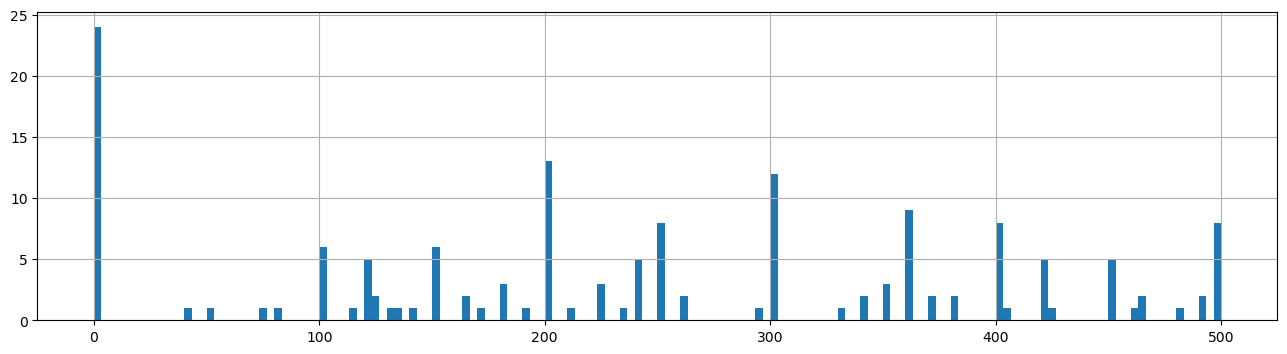

In [232]:
data['box_office'].hist(
                        bins=150,
                        figsize=(16, 4),
                        range=(0, 500));

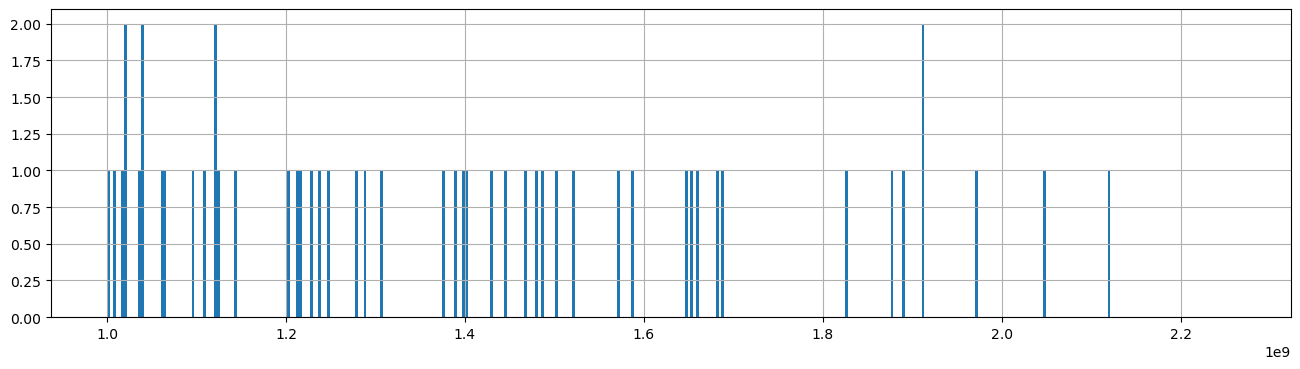

In [233]:
data['box_office'].hist(bins=400, figsize=(16, 4), range=(1.0e9, 2.26e9));

Для столбца `box_office` аномальными будем считать значения менее 100 рублей и более 1 282 479 000, таким образом убираем по 1% минимальных и максимальных значений параметра.

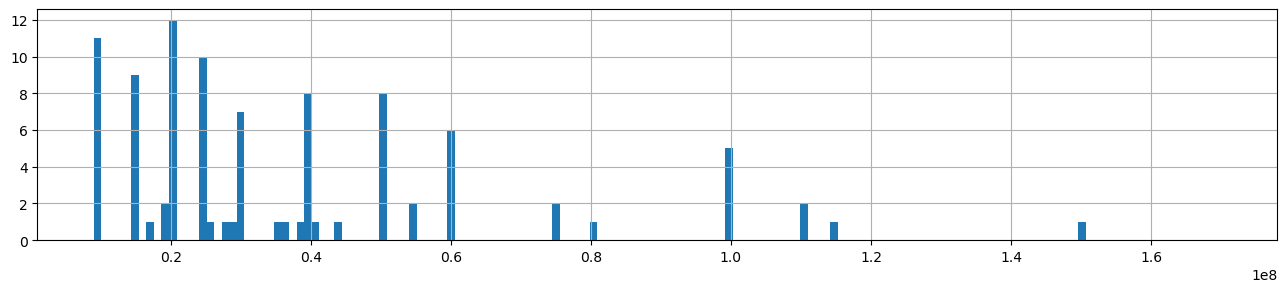

In [234]:
data['refundable_support'].hist(bins=150, figsize=(16, 3), range=(0.9e7, 1.7e8));

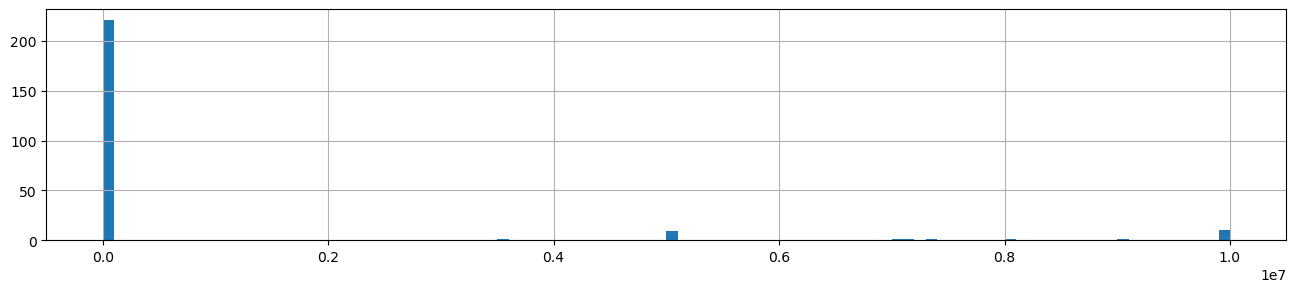

In [235]:
data['refundable_support'].hist(bins=100, figsize=(16, 3), range=(0, 1e7));

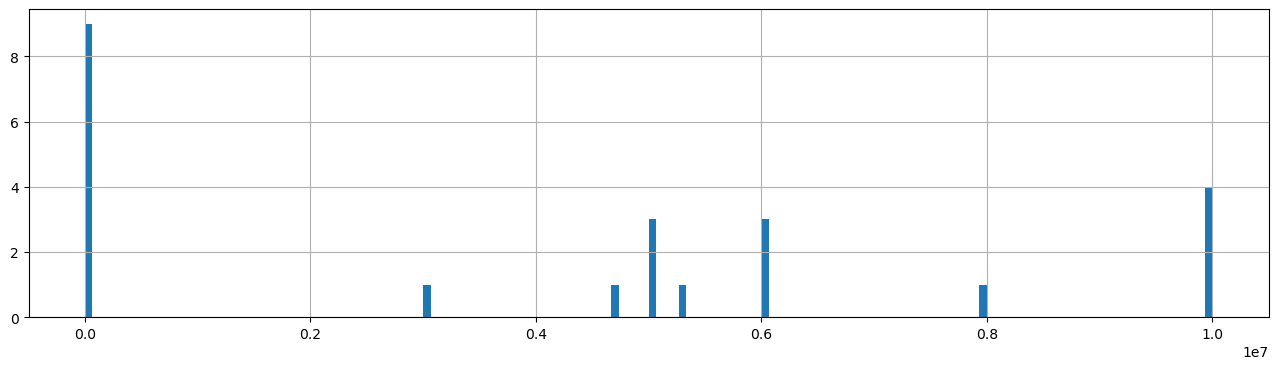

In [236]:
data['nonrefundable_support'].hist(bins=150, figsize=(16, 4), range=(0, 1e7));

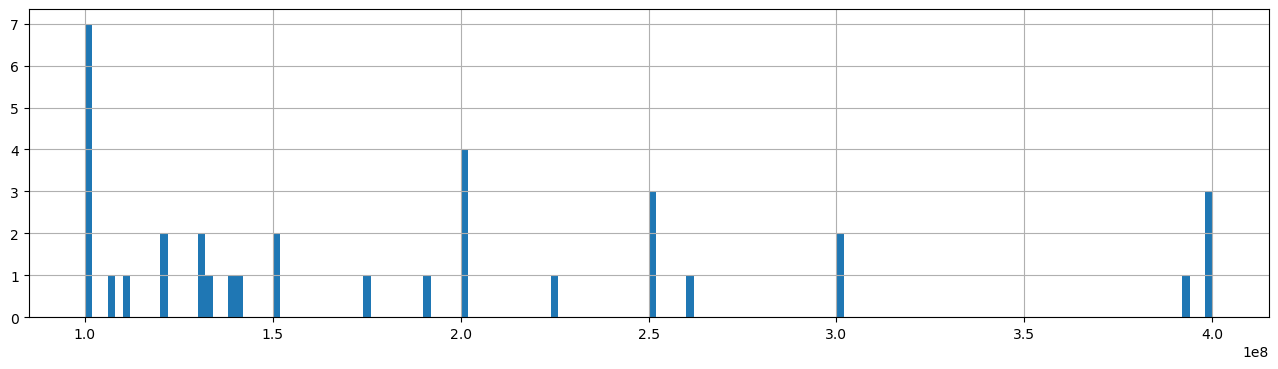

In [237]:
data['nonrefundable_support'].hist(bins=150, figsize=(16, 4), range=(1e8, 4e8));

В столбце `refundable_support` и `nonrefundable_support` уберем 1% максимальных значений - более 110 000 000 и более 363 552 100 рублей соответственно. Нижнюю границу оставим без изменений, поскольку не все фильмы в обязательном порядке долны иметь тот и другой вид софинансирования от Министерства культуры.

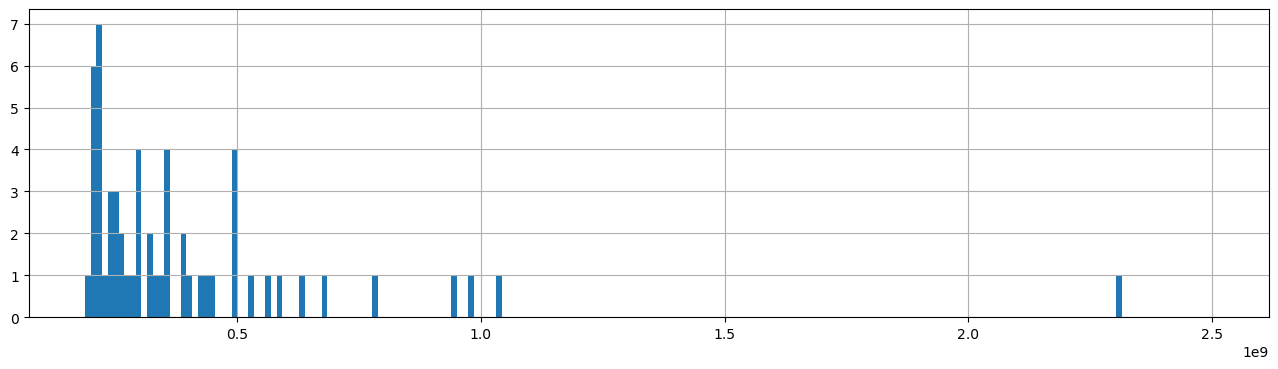

In [238]:
data['budget'].hist(bins=200, figsize=(16, 4), range=(1.88e8, 2.5e9));

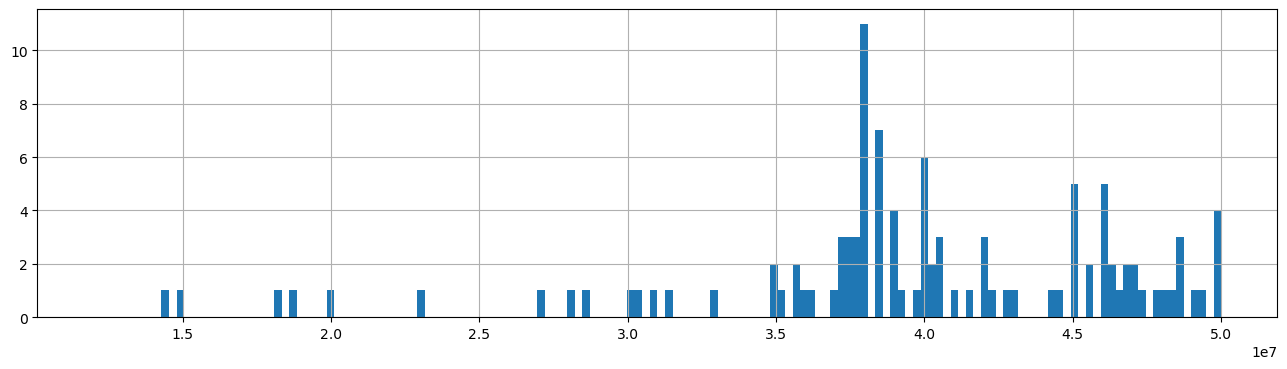

In [239]:
data['budget'].hist(bins=150, figsize=(16, 4), range=(1.2e7, 0.5e8));

В столбце `budget` будем считать аномальными 1% минимальных и 1% максимальных значений, оставим данные, укладывающиеся в диапазон от 18 333 710 до 893 142 000 рублей.

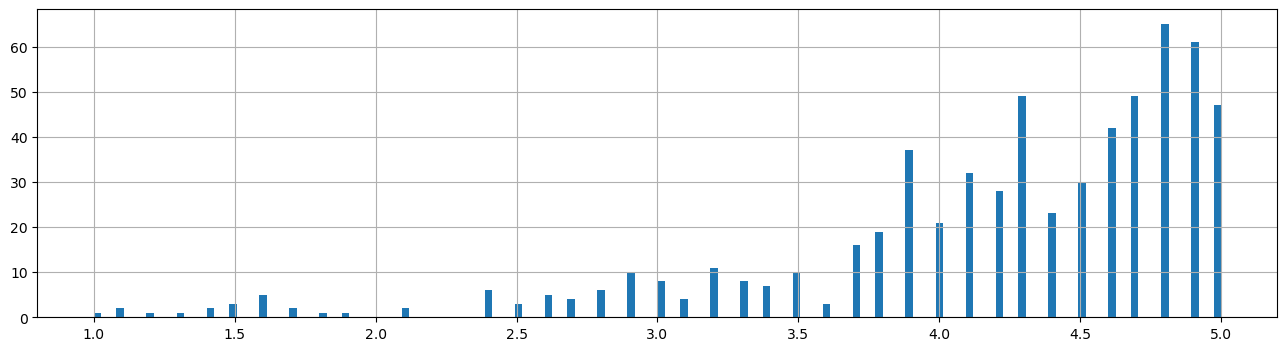

In [240]:
data['ratings'].hist(bins=150, figsize=(16, 4), range=(1, 5));

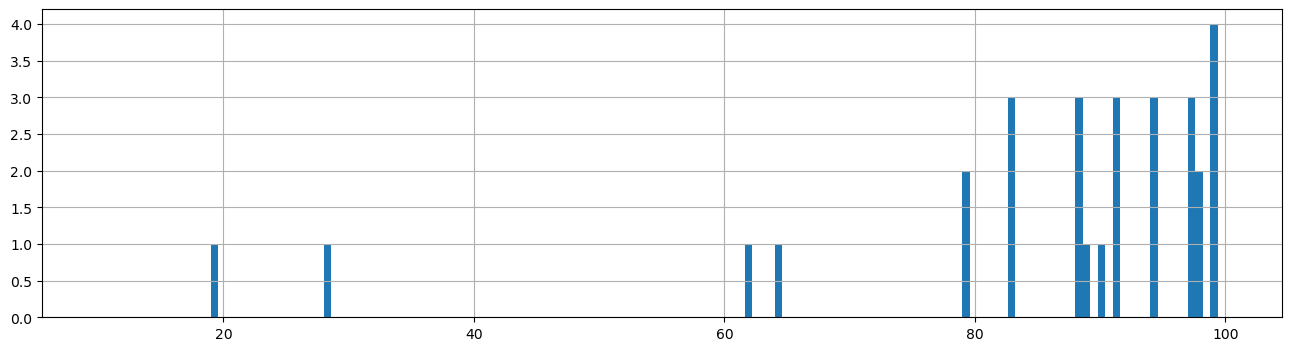

In [241]:
data['ratings'].hist(bins=150, figsize=(16, 4), range=(10, 100));

В столбце `ratings` уберем выбросы, значение которых более 10 и менее 2.6.

In [242]:
(data[data['ratings'] > 10])['ratings'].count()

29

In [243]:
#убираем выбросы, настраиваем фильтр для датасета

data = data[(
    (data['box_office'] > 100) & (
    data['box_office'] < 1.282479e+09) | (
    data['box_office'].isna())) & (
    (data['refundable_support'] < 1.1e08) | (
    data['refundable_support'].isna())) & (
    (data['nonrefundable_support'] > 0) & (
    data['nonrefundable_support'] < 3.635521e+08) | (
    data['nonrefundable_support'].isna())) & (
    (data['budget'] < 8.931420e+08) &  (
    data['budget'] > 1.833371e+07) | (
    data['budget'].isna())) & (
    (data['ratings'] > 2.6) & (
    data['ratings'] < 10) | (
    data['ratings'].isna()))]

data[['puNumber', \
      'box_office', \
      'refundable_support', \
      'nonrefundable_support', \
      'budget', \
      'ratings']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7338 entries, 0 to 7484
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   puNumber               7338 non-null   int64  
 1   box_office             3045 non-null   float64
 2   refundable_support     304 non-null    float64
 3   nonrefundable_support  304 non-null    float64
 4   budget                 304 non-null    float64
 5   ratings                6377 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 401.3 KB


**Вывод:**
- обнаружили, что 17 значений в столбце `budget` меньше суммы `refundable_support` и `nonrefundable_support`. Описание данных говорит нам о том, что budget уже включает эти суммы. Заполнили эти значения параметра budget суммов значений в столбцах `refundable_support` и `nonrefundable_support`;
- обнаружено, что у 25% фильмов в наших данных кассовые сборы от проката (данные в столбце `box_office`) составляют менее 86 239 рублей, что является неправдоподобно малой суммой. Вернемся к более детальному изучению этой особенности в данных на этапе их исследовательского анализа;
- в 29 строках значения в столбце `ratings` больше 10 максимально возможных, удалим эти строки;
- 1.96% данных были удалены как аномальные;
- для 5 параметров сделали фильтры и удалили выбросы.

#### Новые столбцы





Посчитаем и добавим в таблицу следующие параметры:

- год старта проката фильма, столбец `year`;
- имя и фамилия главного продюсера, столбец `main_producer`;
- главный жанр фильма, столбец `main_genre`;
- доля от общего бюджета фильма государственной поддержки, столбец `percent_support`.

In [244]:
data['year'] = data['show_start_date'].dt.year

In [245]:
#def вытащить первое значение из списка в ячейке

def new_col(param):
    try:
        return param.split(',')[0]
    except:
        return param

In [246]:
data['main_producer'] = data['producer'].apply(new_col)
data['main_genre'] = data['genres'].apply(new_col)

In [247]:
data['percent_support'] = round(
                        (data['refundable_support']
                         + data['nonrefundable_support']) / data['budget']*100, 2)

In [248]:
data[['puNumber', 'title', 'year', 'main_producer', 'main_genre', 'percent_support']].head()

,puNumber,title,year,main_producer,main_genre,percent_support
0,111000113,Тайна перевала Дятлова,2013,А.Роднянский,ужасы,NaN
1,111000115,Небесный верблюд,2015,И.Плиско,детский,68.99
2,111000116,"Статус: ""Свободен""",2016,С.Ливнев,комедия,50.83
3,111000117,После тебя,2017,С.Безруков,драма,59.36
4,111000118,ЗОМБОЯЩИК (ZОМБОЯЩИК),2018,Е.Казаков,комедия,NaN


### Исследовательский анализ данных


#### Особенности фильмов, вышедших в прокат

Посмотрим, какое количество фильмов выходило в прокат ежегодно.

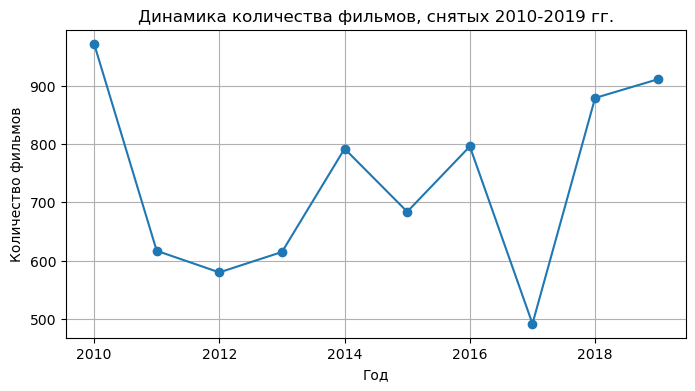

In [249]:
data.pivot_table(
            index='year',
            values=('puNumber'),
            aggfunc='count') \
    .plot(
        style='o-',
        figsize=(8, 4),
        grid=True,
        legend=False,
        xlabel='Год',
        ylabel='Количество фильмов',
        title='Динамика количества фильмов, снятых 2010-2019 гг.');

На графике можем видеть падение значений в 2011-2013 и 2017 годах. Пики значений по количеству фильмов приходится на 2010, 2018, 2019.

Соотношение долей фильмов, относящихся к разным жанрам можно увидеть на диаграмме ниже.

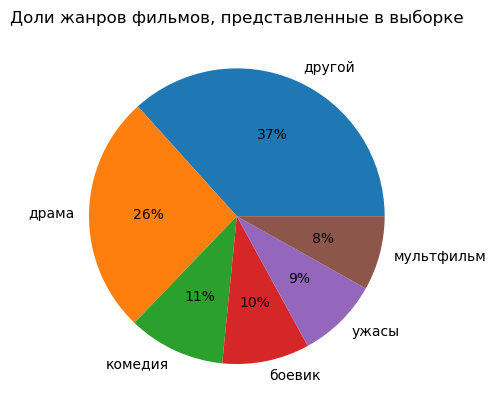

In [250]:
threshold = 5
pie_data = data.main_genre.value_counts()[:threshold]
new_row = pd.Series(data = [data.main_genre.value_counts()[threshold:].sum()],
                    index = ['другой']
)
pie_data = pd.concat([pie_data, new_row])
pie_data
pie_data.sort_values(ascending=False).plot.pie(
                                        autopct = "%.f%%",
                                        title='Доли жанров фильмов, представленные в выборке');

Данные о столбце, содержащем рейтинги, а также средний рейтинг фильмов в динамике по годам, представлены ниже.

In [251]:
data['ratings'].describe()

count    6377.000000
mean        6.501788
std         1.051767
min         2.700000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.200000
Name: ratings, dtype: float64

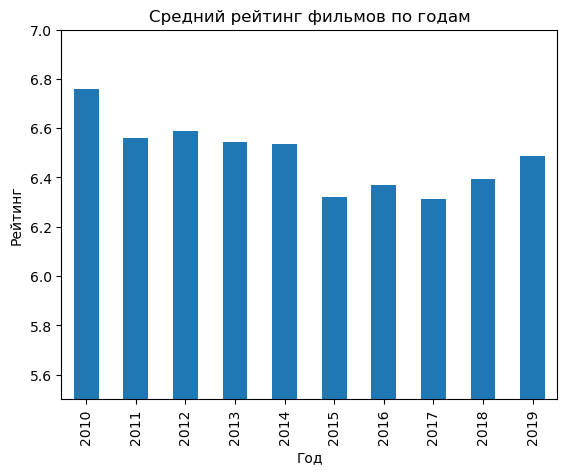

In [252]:
data.pivot_table(index='year', values='ratings').plot.bar(
                                                    legend=False,
                                                    ylim=(5.5, 7),
                                                    xlabel='Год',
                                                    ylabel='Рейтинг',
                                                    title='Средний рейтинг фильмов по годам');

Составим рейтинг самых массовых, по производству фильмов. внашей выборке.

In [253]:
data['film_studio'].value_counts().head().to_frame()

,film_studio
"Киностудия ""Мосфильм""",336
"ООО ""Мульт в кино""",57
Анимаккорд Лтд,22
"ООО ""Мульт в кино""",18
Не определена,18


Вывод:
- топ-3 жанра фильмов, вышедших в прокат: драма - 26%, комедия - 11% , боевик - 10%;
- Студия "Мосфильм" - самая массовая, по представленным в выборке фильмам - 336;
- менее всего фильмов выпущено в 2012 и 2017 годах;
- средний рейтинг фильмов 6.5;
- существует тренд на снижение среднего за год рейтинга фильмов с 2010 до 2019;
- минимальный рейтинг фильма - 2.7, максимальный - 9.2.

#### Анализ сборов фильмов в прокате

Изучим детальнее данные о суммах, которые фильмы собрали от проката в кинотеатрах. Определим возможные взаимосвязи с другими параметрами. 

In [254]:
print(
    'Доля фильмов с указанной информацией о прокате в кинотеатрах:', round(
     data[~data['box_office'].isna()]['box_office'].count() / data['puNumber'].count() * 100, 2)
)

Доля фильмов с указанной информацией о прокате в кинотеатрах: 41.5


Выводы будем делать на основании 41.5% от выборки (3 045 фильмов), по стольки фильмам содержится информация о сборах от проката в кинотеатрах.

Посчитаем среднее значение и медиану суммы сборов фильмов в прокате, а также количество фильмов, на основании которых рассчитываются показатели.

In [255]:
df = data[~data['box_office'].isna()].pivot_table(
                                    index='year',
                                    values='box_office', 
                                    aggfunc=['mean', 'median', 'count'])
df.columns=('mean_box_office', 'median_box_office', 'count')
df

,mean_box_office,median_box_office,count
year,,,
2010,2.462382e+04,1710.000,97
2011,1.305685e+05,3042.500,108
2012,5.856204e+04,6655.000,117
2013,1.711582e+05,3680.000,174
2014,2.730519e+07,22660.000,267
2015,7.239577e+07,4808555.100,449
2016,6.852018e+07,3686055.000,508
2017,1.006939e+08,9580738.000,345
2018,8.220731e+07,8672802.350,466


Медиана суммы сборов за 2010-2014 года в максимуме равна 22 660 рублей, что не соответствует корректному значению. Как мы выяснили на этапе оценки [количественных значений](#Количественные-значения), 25% фильмов среди наших данных о сборах имеют в сумме менее 97 000 рублей, что можно назвать ошибочными или неполными данными. Детальнее посмотрим тенденции в объемах собираемых фильмом средств в прокате за 2015 - 2019 года.

Построим график, показывающий количество фильмов и общую сумму сборов в прокате по годам.

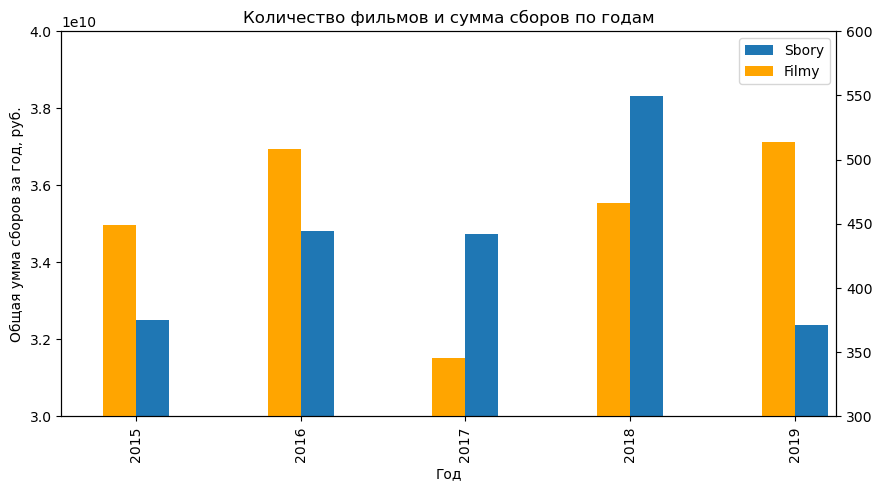

In [256]:
#Количество фильмов и общая сумма сборов в прокате по годам

data_2015_2019 = data[(~data['box_office'].isna()) & (data['year'] > 2014)]

fig, ax = plt.subplots(figsize=(10,5))

width = 0.2
a = data_2015_2019.pivot_table(
                        index='year',
                        values='box_office',
                        aggfunc='sum')

a.columns = ["Sbory"]
a.plot.bar(
    ax = ax,
    ylim=(3e10, 4e10),
    position=0,
    width=width,
    ylabel="Общая умма сборов за год, руб.",
    xlabel='Год',
    title="Количество фильмов и сумма сборов по годам")

b = data_2015_2019.pivot_table(
                            index='year',
                            values='box_office',
                            aggfunc='count')
b.columns = ["Filmy"]
b.plot.bar(
    ax = ax,
    secondary_y = True,
    position=1,
    color='orange',
    width=width,
    xlabel='Год',
    mark_right=False
);
ax.right_ax.set_ylim(300, 600);

В наших данных в 2017 году фильмов в прокат вышло значительно меньше, чем в остальные года, при этом общая сумма сборов осталась на уровне 2016 года, когда фильмов вышло значительно больше. Ниже представлены самые кассовые фильмы 2017 года.

In [257]:
data[(
    ~data['box_office'].isna()) & (
     data['year'] == 2017)] \
        .sort_values('box_office', ascending=False).head()

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,year,main_producer,main_genre,percent_support
2324,121027517,1.246588e+09,Джуманджи: Зов джунглей,2017-12-21 12:00:00+00:00,Художественный,"Мэтт Толмак Продакшнз, Радар Пикчерз, Севен Ба...",США,Джейк Касдан,Мэтт Толмак,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не определен,6.8,"фэнтези,боевик,комедия",2017,Мэтт Толмак,фэнтези,NaN
2080,121022917,1.229588e+09,Тор: Рагнарёк,2017-11-02 12:00:00+00:00,Художественный,"Марвел Интертейнмент, Марвел Студиос, Уолт Дис...",США,Тайка Вайтити,Кеви Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не определен,8.2,"история,драма,боевик",2017,Кеви Фейги,история,NaN
1789,121017617,1.036725e+09,Оно,2017-09-07 12:00:00+00:00,Художественный,"Нью Лайн Синема, КатзСмит Продакшнз, Лин Пикче...",США,Андрес Мускетти,"Сэт Грэм-Смит, Рой Ли, Дэн Лин",«18+» - запрещено для детей,NaN,NaN,NaN,Не определен,7.3,"ужасы,фэнтези,драма",2017,Сэт Грэм-Смит,ужасы,NaN
2606,124000217,8.866141e+08,Зверопой,2017-02-03 12:00:00+00:00,Анимационный,"Дентсю, Фьюджи Телевижн Нетворк Интертейнмент,...",США - Великобритания - Япония,"Гарт Дженнингс, Кристоф Лоурделет","Игорь Хайт, Джанет Хили, Бретт Хоффман",«6+» - для детей старше 6 лет,NaN,NaN,NaN,Не определен,7.3,"мультфильм,мюзикл,комедия",2017,Игорь Хайт,мультфильм,NaN
979,121001517,8.805113e+08,Логан: Росомаха,2017-02-01 12:00:00+00:00,Художественный,"Доннерс Компани, Марвел Интертейнмент, Тэ Эс Г...",США,Джеймс Мэнголд,"Саймон Кинберг, Хатч Паркер, Лорен Шулер Доннер",«18+» - запрещено для детей,NaN,NaN,NaN,Не определен,7.5,"фантастика,боевик,триллер",2017,Саймон Кинберг,фантастика,NaN


In [258]:
#фильм с самым большой суммой кассовых сборов

data_2015_2019.query('box_office == box_office.max()')

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,year,main_producer,main_genre,percent_support
2378,121028518,1.278044e+09,Аквамен,2018-12-13 12:00:00+00:00,Художественный,"Ди Си Комикс, Панорамик Пикчерз, Сафран Компан...",США - Австралия,Джеймс Ван,"Роб Кауэн, Питер Сафран",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Не определен,6.8,"фантастика,фэнтези,боевик",2018,Роб Кауэн,фантастика,NaN


Проверим, есть ли взаимосвязи суммы сборов и других параметров фильма.

In [259]:
data_2015_2019.corr(numeric_only=True)

,puNumber,box_office,refundable_support,nonrefundable_support,budget,ratings,year,percent_support
puNumber,1.000000,-0.017963,0.271453,0.121260,0.215992,0.070343,-0.011472,-0.021436
box_office,-0.017963,1.000000,0.343778,0.474923,0.465627,0.103562,-0.005679,-0.049673
refundable_support,0.271453,0.343778,1.000000,0.269927,0.422649,-0.074637,-0.000822,0.133732
nonrefundable_support,0.121260,0.474923,0.269927,1.000000,0.688374,0.124315,0.102229,0.181793
budget,0.215992,0.465627,0.422649,0.688374,1.000000,0.102791,0.154781,-0.345898
ratings,0.070343,0.103562,-0.074637,0.124315,0.102791,1.000000,0.050644,-0.029323
year,-0.011472,-0.005679,-0.000822,0.102229,0.154781,0.050644,1.000000,-0.112637
percent_support,-0.021436,-0.049673,0.133732,0.181793,-0.345898,-0.029323,-0.112637,1.000000


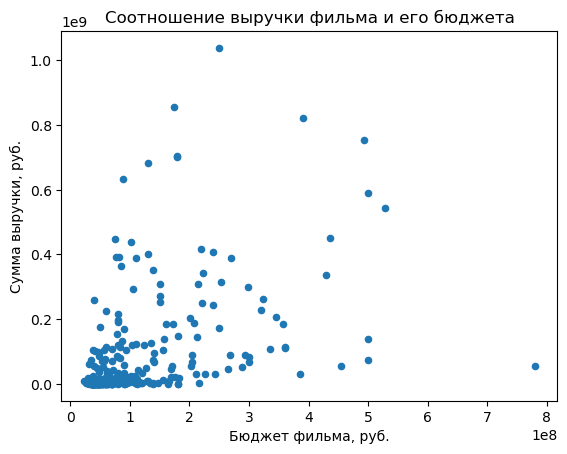

In [260]:
data.plot(
    y='box_office',
    x='budget',
    kind='scatter',
    xlabel='Бюджет фильма, руб.',
    ylabel='Сумма выручки, руб.',
    title='Соотношение выручки фильма и его бюджета');

Сумма сборов и бюджет фильма объединяет среднее проявление взаимозависимости, выраженная через коэффициен корреляции 0.47. Но стоит учитывать, что расчеты построены на небольшой выборке и чтобы уточнить наличие или отсутствие возможных взаимосвязей, стоит расширить анализируемую выборку. 

Определим, влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год. 

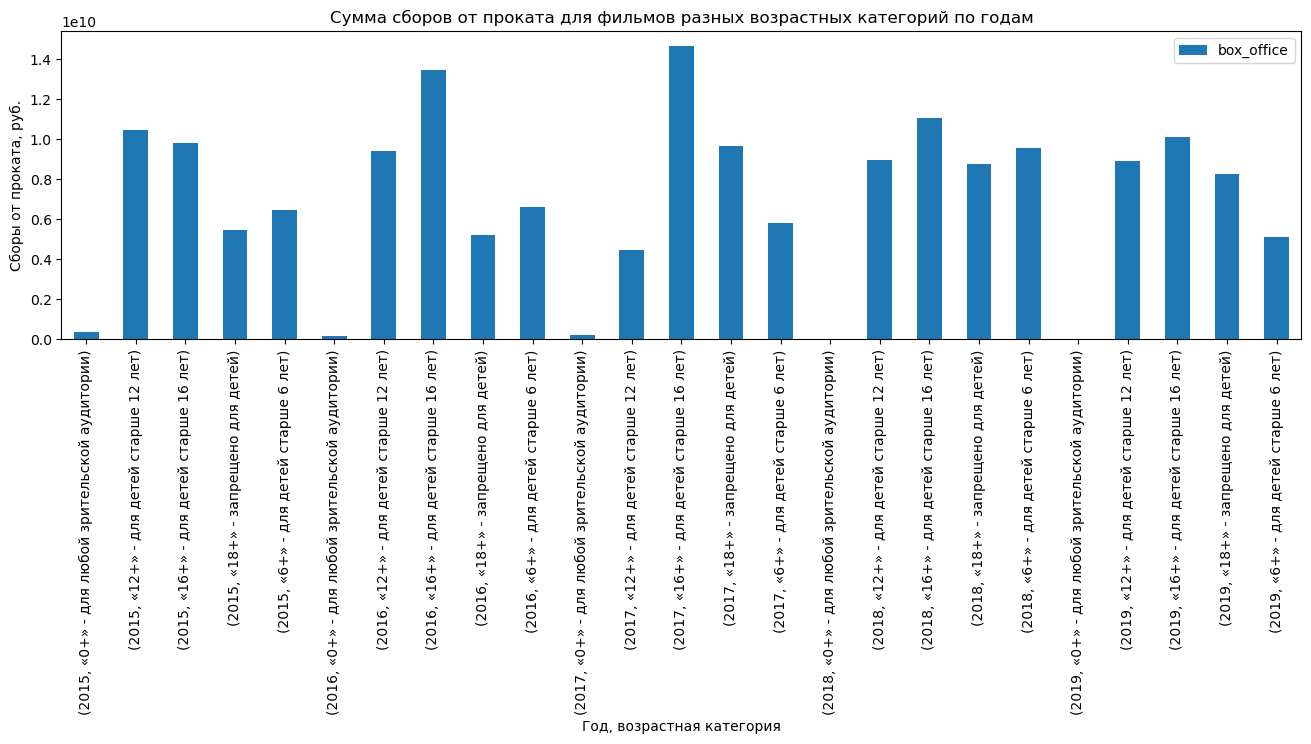

In [261]:
data_2015_2019.pivot_table(
                    index=['year', 'age_restriction'],
                    values='box_office', 
                    aggfunc='sum').plot.bar(
    figsize=(16, 4),
    xlabel='Год, возрастная категория',
    ylabel='Сборы от проката, руб.',
    title='Сумма сборов от проката для фильмов разных возрастных категорий по годам');

Сушествуют выраженные особенности суммы сборов в зависимости от возрастного органичения фильма. Также в течение 5 лет с 2015 по 2019 происходили некоторые визоизменения распределения выручки среди фильмов для разных возрастных групп.

- в 2015 году лидером по сумме сборов были фильмы с ограничением 12+.
- в 2016 - 2019 годах лидирующую позицию по сумме сборов в прокате занимают фильмы с возрастным ограничением 16+ и значительно растут в выручке в 2016 и 2017 годах
- кино с цензом 12+ течение 5 лет имеет примерно одинаковый уровень сборов, проседая только в 2017
- фильмы 6+ хорошо подрасли в сборах в 2018, имея до 2018 достаточно стабильные показатели. В 2019 общая сумма сборов вернулась к показателям 2015-2017.

Лидирующие места сумм сборов в динамике по годам среди фильмов 12+ и 16+ можно объяснить их доступностью для самого массового зрителя, фактически такие фильмы предпочтет 80% зрителей. Кино для самых маленьких (0+ и 6+) предпочтут скорее семьи с маленькими детьми, ведь подростки смогут пойти на фильм 12+ с родителями.  

Составим рейтинг самых кассовых режиссеров в 2015-2019 годах.

In [262]:
top_director = data_2015_2019.pivot_table(
                                    index='director',
                                    values='box_office',
                                    aggfunc=['sum', 'count'])

top_director.columns=('sbory', 'count_films')
top_director.sort_values(by='sbory', ascending=False).head(10)

,sbory,count_films
director,,
Дэвид Литч,2.541558e+09,4
Геннадий Тартаковский,2.125400e+09,2
Джон Уоттс,2.071207e+09,2
Брайан Сингер,1.662524e+09,2
Джеймс Ван,1.550916e+09,2
Квентин Тарантино,1.520678e+09,3
Зак Снайдер,1.437060e+09,2
Джеймс Фоули,1.352756e+09,2
Пейтон Рид,1.306801e+09,2


**Вывод:**
- 41.5% данных в нашем датафрейме содержат информацию о кассовых сборах фильма;
- данные с 2010 по 2014 год включительно будем считать недостаточными для анализа - малое количество фильмов и некорректные суммы сборов с максимальной медианой 22 660 рублей;
- самые кассовые из всей выборки фильмы выпустили в 2017 году - максимальное значение среднего сбора за фильм;
- самая популярная возрастная категория фильмов - 16+;
- сумма сборов и бюджет фильма объединяет средняя выраженность взаимозависимости, выраженная через коэффициен корреляции 0.47;
- самый кассовый режиссер в нашей выборке - Дэвид Литч, общая сумма кассовых сборов в нашей выборке за фильмы которого равна 2 541 558 000 рублей

#### Фильмы, которые получили государственную поддержку

Посмотрим подробнее фильмы с господдержкой и их особенности. Посчитаем какую долю они занимают в общей выборке, насколько успешны в прокате, средний рейтинг.

In [263]:
movies_support = data[~data['budget'].isna()]
movies_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 1 to 7478
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   puNumber               304 non-null    int64              
 1   box_office             291 non-null    float64            
 2   title                  304 non-null    object             
 3   show_start_date        304 non-null    datetime64[ns, UTC]
 4   type                   304 non-null    object             
 5   film_studio            304 non-null    object             
 6   production_country     304 non-null    object             
 7   director               304 non-null    object             
 8   producer               304 non-null    object             
 9   age_restriction        304 non-null    object             
 10  refundable_support     304 non-null    float64            
 11  nonrefundable_support  304 non-null    float64           

Создали новый датафрейм movies_support, который включает в себя только строки с фильмами, получившими государственную поддержку. 304 строки в датафрейме, или 4.1% данных от исходного очищенного файла.

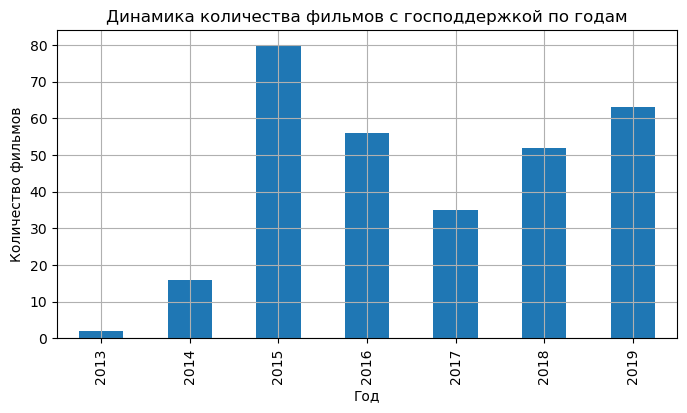

In [264]:
#количество фильмов по годам с поддержкой

movies_support.pivot_table(
                    index='year',
                    values='puNumber',
                    aggfunc='count') \
              .plot.bar(
                    grid=True,
                    legend=False,
                    figsize=(8, 4),
                    ylabel='Количество фильмов',
                    xlabel='Год',
                    title='Динамика количества фильмов с господдержкой по годам');

In [265]:
movies_support.pivot_table(
                    index='year',
                    values='puNumber',
                    aggfunc='count')#.mean()

,puNumber
year,
2013,2
2014,16
2015,80
2016,56
2017,35
2018,52
2019,63


In [266]:
movies_support.pivot_table(
                    index='year',
                    values='puNumber',
                    aggfunc='count') \
              .mean()

puNumber    43.428571
dtype: float64

- максимальное количество фильмов было профинансировано в 2015 году(80 фильмов), минимальное - в 2013 (2 фильма);
- в среднем ежегодно финансируется 43 фильма.

In [267]:
#общая сумма финансирования

(movies_support['refundable_support'] + movies_support['nonrefundable_support']).sum()

16130883830.0

In [268]:
#доля возвращаемой поддержки от общего гос финансирования

movies_support['refundable_support'].sum() / (movies_support['refundable_support'] \
                                              + movies_support['nonrefundable_support']).sum() *100

15.498220843612634

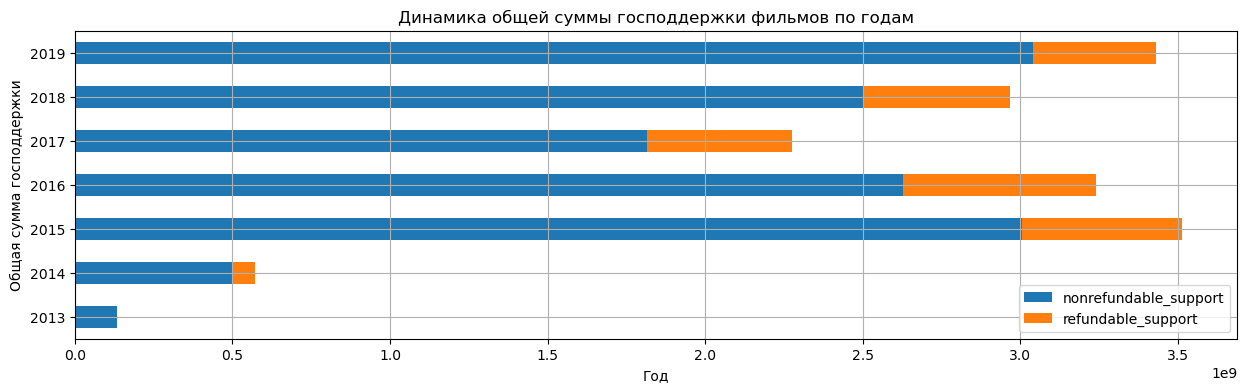

In [269]:
#общая сумма поддержки по годам (+возвращаемой и не возвращаемой отдельно)

movies_support.pivot_table(
                    index='year',
                    values=['refundable_support', 'nonrefundable_support'],
                    aggfunc='sum') \
              .plot.barh(
                    stacked=True,
                    figsize=(15, 4),
                    grid=True,
                    ylabel='Общая сумма господдержки',
                    xlabel='Год',
                    title='Динамика общей суммы господдержки фильмов по годам');

Общий объем государственной поддержки 2013-2019 гг. на производство кино и мультфильмов -  16 130 883 830, из них
- 15.5% - возвращаемая сумма
- 84.4% - не возвращаемые финансовые вложения.

Максимальная сумма была выделена в 2015 году - около 3.5 миллиардов рублей.

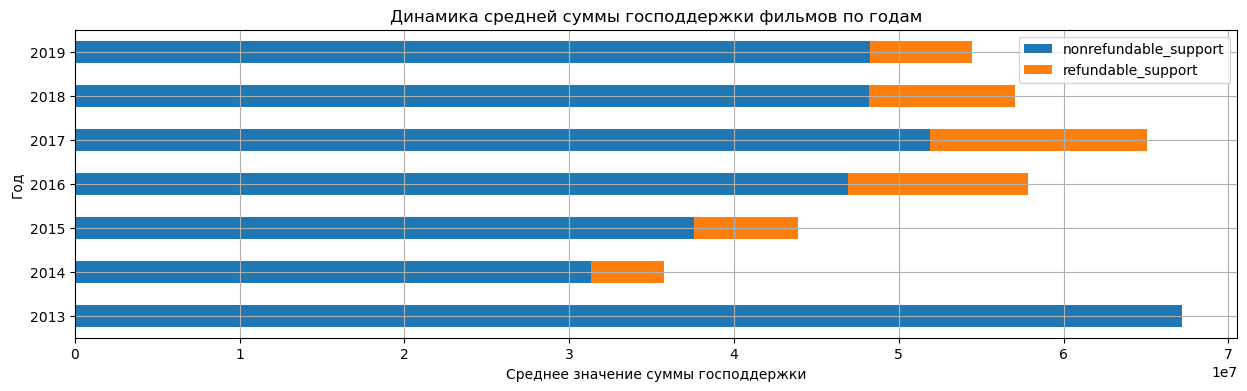

In [270]:
#средняя сумма поддержки по годам

movies_support.pivot_table(
    index='year', values=['refundable_support', \
                          'nonrefundable_support']) \
              .plot.barh(
                    stacked=True,
                    figsize=(15, 4),
                    grid=True,
                    ylabel='Год',
                    xlabel='Среднее значение суммы господдержки',
                    title='Динамика средней суммы господдержки фильмов по годам');

- Максимальная средняя сумма финансовой поддержки, выделенной на производство фильмов, была произведена в 2013, причем 100% поддержки было оказано без необходимости возврата части инвестиций.
- В средняя сумма поддержки в 2014 значительно снизилась и до 2017 года имела стабильную тенденцию роста, как и доля возвратных средств.
- С 2017 по 2019 - тренд на уменьшение средней суммы, выделенной на поддержку 1 фильма.

In [271]:
movies_support['ratings'].describe()

count    289.000000
mean       6.021799
std        1.070781
min        2.800000
25%        5.300000
50%        6.200000
75%        6.700000
max        8.500000
Name: ratings, dtype: float64

In [272]:
# топ-7 компаний по количеству софинансируемых государством фильмов
movies_support['film_studio'].value_counts().head(7).to_frame()

,film_studio
"ООО ""Кинокомпания ""СТВ""",6
"ООО ""ТаББаК""",5
"ООО ""Студия анимационного кино ""Мельница""",4
"ООО ""Киностудия ""ВЕРТИКАЛЬ""",4
"ООО ""Продюсерский центр ""Ленфильм""",4
"ООО ""ВИЗАРТ ФИЛЬМ""",4
"ООО ""Каро Продакшн""",4


/var/folders/5n/tcs__6sd74122_kzkls7z_lh0000gn/T/ipykernel_30755/883688824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_support['profit'] = movies_support['box_office'] - movies_support['budget']


,mean_profit,count
year,,
2013,-1.175565e+08,2
2014,-1.781641e+07,16
2015,-1.859969e+07,79
2016,-3.166378e+07,55
2017,6.191989e+06,33
2018,-7.310232e+06,52
2019,-7.037064e+07,54


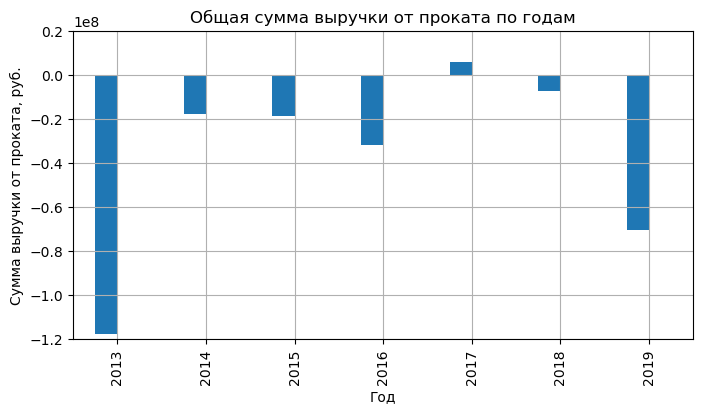

In [273]:
#по годам средняя разница сборы-бюджет(profit)
movies_support['profit'] = movies_support['box_office'] - movies_support['budget']

profit_mean = movies_support.pivot_table(
                                index='year',
                                values='profit',
                                aggfunc=['mean', 'count'])

profit_mean.columns=('mean_profit', 'count')

profit_mean.plot.bar(
                ylim=(-1.2e8, 0.2e8),
                grid=True, legend=False,
                figsize=(8, 4),
                ylabel='Сумма выручки от проката, руб.',
                xlabel='Год',
                title='Общая сумма выручки от проката по годам');
profit_mean

Тoлько в 2017 году можно наблюдать положительный баланс между средними бюджетами фильмов и суммой сборов от кинопроката, во все остальные исследуемые года суммма сборов в среднем оказывалась меньше, чем затраты на производство фильмов.

In [274]:
#доля господдержки по жанрам

genre_support = movies_support.pivot_table(
    index='main_genre', values='puNumber', aggfunc='count')

genre_support.columns = ['count']
genre_support['ratio'] = genre_support['count'] / 287 * 100

genre_support.sort_values('count', ascending=False).head()

,count,ratio
main_genre,,
драма,88,30.662021
комедия,66,22.996516
мультфильм,27,9.407666
триллер,15,5.226481
мелодрама,13,4.529617


30% финансируемы фильмов относятся к жанру драма, 23% - комедия, 9,4% - мультфильмы.

In [275]:
#количество окупившихся фильмов с господдержкой по годам
profit_positive = movies_support.query(
    'profit > 0 & year > 2013').pivot_table(index='year', values=('profit'), aggfunc='count')

profit_negative = movies_support.query(
    'profit < 0 & year > 2013').pivot_table(index='year', values=('profit'), aggfunc='count')

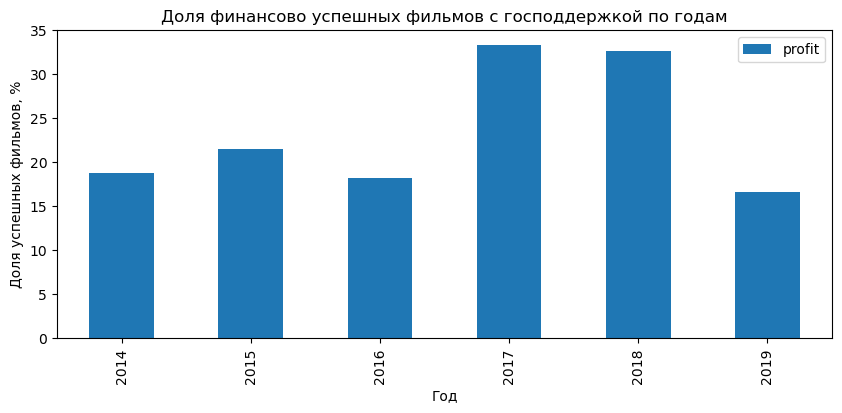

In [276]:
#доля успешных фильмов с господдержкой по годам

(profit_positive/(profit_positive+profit_negative) * 100).plot.bar(
                                ylabel='Доля успешных фильмов, %',
                                xlabel='Год',
                                title='Доля финансово успешных фильмов c господдержкой по годам',
                                figsize=(10, 4));

In [277]:
#самый успешный в финансировании фильм
movies_support.query('profit == profit.max()')[['title', \
                                                'director', \
                                                'box_office', \
                                                'refundable_support', \
                                                'nonrefundable_support', \
                                                'budget', \
                                                'profit']]

,title,director,box_office,refundable_support,nonrefundable_support,budget,profit
676,Притяжение (2016),Ф.Бондарчук,1.038321e+09,0.0,250000000.0,250000000.0,788321489.0


In [278]:
#самый провальный в финансировании фильм
movies_support.query('profit == profit.min()')[['title', \
                                                'director', \
                                                'box_office', \
                                                'refundable_support', \
                                                'nonrefundable_support', \
                                                'budget', \
                                                'profit']]

,title,director,box_office,refundable_support,nonrefundable_support,budget,profit
599,Грех,А.Михалков (псевдоним А.Кончаловский),54243202.71,0.0,60000000.0,779941965.0,-7.256988e+08


**Выводы:**
- в выборку попали 304 фильма, данные о которых указывают на софинансирование их производства из средств Министрерства культуры, а это 4.1% данных от исходного очищенного файла. Подобный объем данных не позволит сделать надерные статистические выводы, но поможет оценить тенденции во взаимосвязях параметров;
- в 2013 годы средняя сумма оказываемой поддержки для производства фильма была максимально без необходимости возврата;
- с 2014 по 2017 средняя сумма поддержки увеличивается и в ней растет доля возвратных инвестиций;
- в 2018-2019 существует тренд на снижение средней выделяемой суммы поддержки на 1 фильм;
- средний рейтинг фильмов с господдержкой - 6.0 и варьируется от 2.8 до 8.2;
- 23,2% финансированных государством фильмов окупилось;
- 30% финансируемы фильмов относятся к жанру драма, 23% - комедия, 9,4% - мультфильмы;
- топ-3 киностудии по частоте финансирования: ООО "Кинокомпания "СТВ" (6 фильмов), ООО "ТаББаК"	(5 фильмов), ООО "ВИЗАРТ ФИЛЬМ" (4 фильма);
- самый успешный фильм, финансированный Министерством культуры - "Притяжение", режиссер Ф. Бондарчук;
- самый провальный фильм, финансируемый Министерством культуры - "Грех", режиссер А. Михалков.

### Общий вывод

- Общее количество строк в таблице после успешного объединения датафреймов - 7 486, количество строк после удаления аномальных значений - 7 338;  
- итого после обработки данных осталось 97.9% строк, 2,1% строк удалили как содержащие аномальные значения;
- заменили типы данных в 2х столбцах `show_start_date` и `ratings`;
- заполнили пропущенные значения в столбцах `genres`, `producer`, `film_studio`, `director`, `financing_source`, содержащих категориальные данные, на значение "Не определен";
- столбцы `budget`, `nonrefundable_support`, `refundable_support`, `box_office`, `ratings`, в которых содержатся количественные данные и есть пропуски, оставим без изменений, поскольку некорректно заполнять их расчетными значениями, основываясь на других фильмах, а также заполнять нулями, так как это исказит результаты дальнейшего анализа (расчет среднего значения, выбросы, квантили);
- обнаружили, что у 25% фильмов в наших данных кассовые сборы от проката (данные в столбце box_office) составляют [менее 86 000](#Количественные-значения), что является неправдоподобно малой суммой. Эти [данные приходятся на 2010-2014 года](#Анализ-сборов-фильмов-в-прокате), анализ особенностей фильмов относительно сумм кассовых сборов будем проводить за период 2015-2019;
- для 5 [параметров](#Количественные-значения) сделали фильтры и удалили выбросы;
- добавили в датафрейм новые столбцы: год старта проката фильма, столбец year, имя и фамилия главного продюсера, столбец main_producer, главный жанр фильма, столбец main_genre, доля от общего бюджета фильма государственной поддержки, столбец percent_support;
- топ-3 жанра фильмов, вышедших в прокат: драма - 27%, комедия - 11% , боевик - 9%;
- Студия "Мосфильм" - самая массовая, по представленным в выборке фильмам - 332;
- менее всего фильмов выпущено в 2011 и 2017 годах;
- средний рейтинг фильмов 6.5, минимальный рейтинг фильма - 2.6, максимальный - 9.2;
- 41.5% данных в нашем датафрейме содержат информацию о кассовых сборах фильма;
- самые кассовый из всей выборки фильмы выпустили в 2018 году - максимальное значение суммы сбора за фильм - это фильм Аквамен, режиссер Д. Ван;
- сумма сборов и бюджет фильма объединяет средняя выраженность взаимозависимости, выраженная через коэффициен корреляции 0.47;
- самый кассовый режиссер в нашей выборке - Дэвид Литч, общая сумма кассовых сборов в нашей выборке за фильмы которого равна 2 541 558 000 рублей
- в выборку фильмов с господдержкой попали 304 фильма, данные о которых указывают на софинансирование их производства из средств Министрерства культуры, а это 4.1% данных от исходного очищенного файла. Подобный объем данных не позволит сделать надерные статистические выводы, но поможет оценить тенденции во взаимосвязях параметров;
- общий объем государственной поддержки 2013-2019 гг. на производство кино и мультфильмов - 16 130 883 830, из них 84.5% - не возвращаемые финансовые вложения;
- в среднем ежегодно финансируется 43 фильма, максимальное количество фильмов было профинансировано в 2015 году(80 фильмов), минимальное - в 2013 (2 фильма);
- топ-3 киностудии по частоте финансирования: ООО "Кинокомпания "СТВ" (6 фильмов), ООО "ТаББаК" (5 фильмов), ООО "ВИЗАРТ ФИЛЬМ" (4 фильма);
- с 2014 по 2017 средняя сумма поддержки увеличивается и в ней растет доля возвратных инвестиций, в 2018-2019 существует тренд на снижение средней выделяемой суммы поддержки на 1 фильм;
- средний рейтинг фильмов с господдержкой - 6.0 и варьируется от 2.8 до 8.2;
- 30% финансируемы фильмов относятся к жанру драма, 23% - комедия, 9,4% - мультфильмы;
- 23,2% финансированных государством фильмов окупилось.